<a href="https://colab.research.google.com/github/dua-harshit/Wiki-Web-Scraper/blob/main/Web_scrap_wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [3]:
url = 'https://en.wikipedia.org/wiki/Epidemiology_of_depression'

In [4]:
html = urlopen(url)

In [5]:
soup = BeautifulSoup(html, 'html.parser')

In [6]:
tables = soup.find_all('table')

In [7]:
#convert number as string to integer
#re.sub() returns the substring that match the regrex
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))


In [8]:
num1 = re.sub(r'[^\w\s.]','','1,156.30')
num1

'1156.30'

In [9]:
ranks = []
rates = []
countries = []
links = []

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        
        if len(cells) > 1:
            rank = cells[0]
            ranks.append(int(rank.text))
            
            country = cells[1]
            countries.append(country.text.strip())
            
            rate = cells[2]
            rates.append(process_num(rate.text.strip()))
            
            link = cells[1].find('a').get('href')
            links.append('https://en.wikipedia.org/'+ link)
            
df1 = pd.DataFrame(ranks, index= countries, columns = ['Rank'])
df1['DALY rate'] = rates

df1.head(10)

,Rank,DALY rate
United States,1,1454.74
Nepal,2,1424.48
East Timor,3,1404.10
Bangladesh,4,1401.53
India,5,1400.84
Pakistan,6,1400.42
Brazil,7,1396.10
Maldives,8,1391.61
Bhutan,9,1385.53
Afghanistan,10,1385.14


In [10]:
sun_url = urlopen('https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration')
sun = BeautifulSoup(sun_url, 'html.parser')
tables = sun.find_all('table')

#Dictionary to hold the name of the country and its corresponding temperature
country_suns = {}

#Dictionary to hold the country and its frequency in the table
count = {}
for table in tables:
    if len(table) >1:
        rows = table.find_all('tr')
        
        #Skip the first row, which is the name of the columns
        for row in rows[1:]:
            cells = row.find_all('td')
            country = cells[0].text.strip()
            
            #If country in the list of country we found previously
            #append the country to the dictionary
            if country in countries:
                
                sun = cells[-2].text.strip()
                sun = process_num(sun)/10
                
                #If country is already in the dictionary
                #add to the existing sun hours of that country and the count to keep track of how many times we add
                if country in country_suns:
                    count[country] += 1
                    country_suns[country] += sun
                    
                else:
                    count[country] = 1
                    country_suns[country] = sun
                    

#Find the average temperature of each country
for country in country_suns:
    #print(country_suns[country],count[country])
    country_suns[country] = round(country_suns[country]/count[country],2)
    #print('Country: {}, Sunshine Hours: {}'.format(country,country_suns[country]))
                

In [11]:
df2 = pd.DataFrame.from_dict(country_suns,orient='index', columns = ['Sunshine Hours/Year'])
print(df2.head(10))
df = df1.join(df2)

df.info()


              Sunshine Hours/Year
Benin                      263.05
Togo                       258.00
Ghana                      236.75
Cameroon                   216.51
Gabon                      172.02
Nigeria                    266.91
Sudan                      355.95
Eritrea                    336.10
Burkina Faso               320.90
Niger                      320.32
<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, United States to Japan
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 192 non-null    int64  
 1   DALY rate            192 non-null    float64
 2   Sunshine Hours/Year  125 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.0+ KB


In [12]:
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, United States to Japan
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 125 non-null    int64  
 1   DALY rate            125 non-null    float64
 2   Sunshine Hours/Year  125 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.9+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


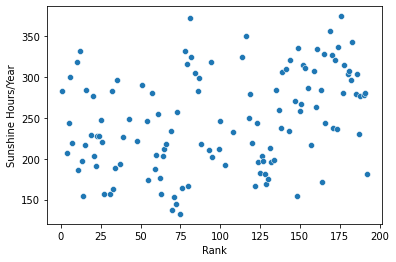

In [13]:
df.info()

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot('Rank', 'Sunshine Hours/Year', data=df)

In [14]:
df.corr()

,Rank,DALY rate,Sunshine Hours/Year
Rank,1.000000,-0.963418,0.337272
DALY rate,-0.963418,1.000000,-0.277674
Sunshine Hours/Year,0.337272,-0.277674,1.000000


In [15]:
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
gdp = urlopen(url2)


In [16]:
soup = BeautifulSoup(gdp, 'html.parser')


In [17]:
tables = soup.find_all('table')


In [35]:
x=0
y=0
incomes = []
ranks = []
countries = []
links = []

for table in tables:
  rows = table.find_all('tr')
  for row in rows:
    cells = row.find_all('td')
    for cell in cells:
      innertables = cell.find_all('table')
      for innertable in innertables:
        x+=1
        if(x==1):
          innerrows = innertable.find_all('tr')
          for innerrow in innerrows:
            innercells = innerrow.find_all('td')
            
            
            if len(innercells)>1:
              
              #rank = innercells[0]
              #print(rank)

              country = innercells[1]
              countries.append(country.text.strip())
              
              y+=1
              ranks.append(y)           
                          
              
              income = innercells[2]
              incomes.append(process_num(income.text.strip())/12)
              
              link = innercells[1].find('a').get('href')
              links.append('https://en.wikipedia.org/'+ link)
              

df3 = pd.DataFrame(index= countries,)
df3['Incomes'] = incomes

df3.head(10)
    

,Incomes
Luxembourg,9133.500000
Switzerland,6822.250000
Ireland,6639.083333
Norway,5665.750000
United States,5254.250000
Singapore,4873.666667
Denmark,4869.916667
Iceland,4765.750000
Qatar,4395.916667
Australia,4323.750000


In [36]:
df4 = df1.join(df3)

df4.dropna(inplace=True)
df4.info()
print(df4.head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, United States to Japan
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       173 non-null    int64  
 1   DALY rate  173 non-null    float64
 2   Incomes    173 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.4+ KB
               Rank  DALY rate      Incomes
United States     1    1454.74  5254.250000
Nepal             2    1424.48    93.000000
East Timor        3    1404.10   121.333333
Bangladesh        4    1401.53   157.250000
India             5    1400.84   156.416667
Brazil            7    1396.10   537.500000
Maldives          8    1391.61  1038.666667
Bhutan            9    1385.53   285.916667
Afghanistan      10    1385.14    41.583333
Finland          11    1344.13  4038.416667
Israel           12    1273.92  3463.333333
Slovenia         13    1248.47  2086.583333
Belgium          14    1244.46  3651.166667
France           15 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


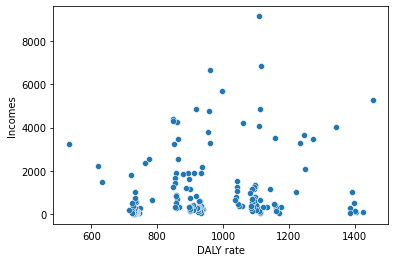

In [37]:
sns.scatterplot('DALY rate','Incomes', data=df4)

In [39]:
df4.corr()

,Rank,DALY rate,Incomes
Rank,1.000000,-0.962306,-0.217687
DALY rate,-0.962306,1.000000,0.188412
Incomes,-0.217687,0.188412,1.000000


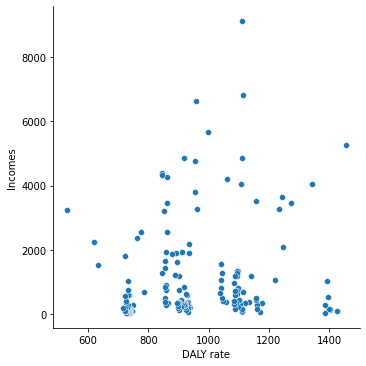

In [38]:
sns.relplot(
    data=df4,
    x="DALY rate", y="Incomes")